In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#!pip install squarify
import squarify
import numpy as np
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

surv = pd.read_csv("survey_eng.tsv",sep="\t").iloc[:,2:]


In [2]:
ages = surv["Age"].value_counts().sort_index()
ages = 100*(ages/ages.sum())

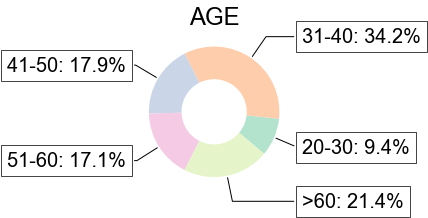

In [3]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in ages.items()]

data = ages.values

colors =['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9']
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("AGE")

plt.show()

In [4]:
gender = surv["Gender"].value_counts().sort_index(ascending=False)
gender = 100*(gender/gender.sum())


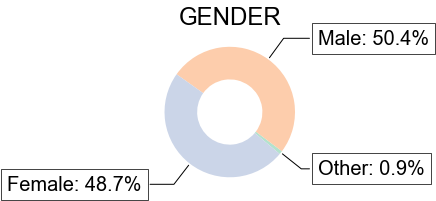

In [5]:

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in gender.items()]

data = gender.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("GENDER")

plt.show()


In [6]:
surv["Country where you work"] = surv["Country where you work"].apply(lambda x: x.lower().strip())

for c in surv["Country where you work"]:
    if c.lower() in ['uk', 'united kingdom (scotland)']:
        surv.loc[surv["Country where you work"]==c,"Country where you work"] = 'united kingdom'
    if c.lower() in ['brasil']:
        surv.loc[surv["Country where you work"]==c,"Country where you work"] = 'brazil'
    if c.lower() in ['usa', 'united states']:
        surv.loc[surv["Country where you work"]==c,"Country where you work"] = 'united states of america'
    if c.lower() in ['russian federation']:
        surv.loc[surv["Country where you work"]==c,"Country where you work"] = 'russia'    
    if c.lower() in ['korea, south']:
        surv.loc[surv["Country where you work"]==c,"Country where you work"] = 'korea'    
    
    

surv["Country where you work"].value_counts()

brazil                      22
ireland                     17
united kingdom               9
united states of america     8
germany                      8
japan                        6
spain                        5
india                        4
canada                       4
singapore                    3
russia                       3
south africa                 3
azerbaijan                   3
france                       2
nigeria                      2
nepal                        2
botswana                     2
lithuania                    1
australia                    1
korea                        1
cayman islands               1
belgium                      1
israel                       1
kenya                        1
norway                       1
europe                       1
bosnia and herzegovina       1
poland                       1
netherlands                  1
colombia                     1
portugal                     1
Name: Country where you work, dtype: in

In [7]:
import geopandas as gpd

#import world shape map externally, no need to have a saved file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
import pycountry
surv["Country"]=np.nan
for i,c in enumerate(surv["Country where you work"]):
    if c=="korea":
        surv.loc[i,"Country"] = "KR"
    elif c!="europe":
        temp = pycountry.countries.search_fuzzy(c)
        surv.loc[i,"Country"] = temp[0].alpha_3


In [9]:
nat_count = surv["Country"].value_counts().reset_index().rename(columns = dict(Country="Num",index="Country"))
#nat_count["Num"] = 100 * (nat_count["Num"]/nat_count["Num"].sum())
for_plotting = world[world["continent"]!="Antarctica"].merge(nat_count, left_on = 'iso_a3', right_on = 'Country',how="outer")
for_plotting["Num"].fillna(-10, inplace=True,)
for_plotting.head(2)
#nat_count

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Num
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,-10.0
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,-10.0


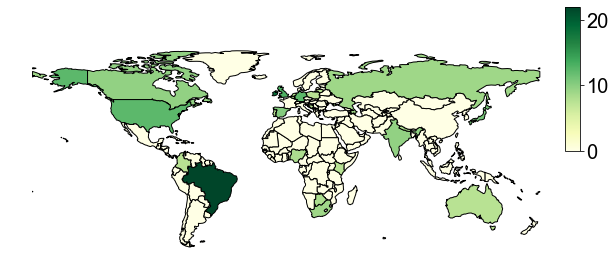

In [10]:

fig, ax =plt.subplots(figsize=(10,10))
for_plotting.plot(column='Num', 
                  cmap = 'YlGn', ax=ax  ,legend = False,
                    scheme=None, k=3,
                    edgecolor="black",facecolor="white")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

cax = fig.add_axes([.9, 0.5, 0.02, 0.2])
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=0, vmax=22))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.ax.tick_params(labelsize=20) 

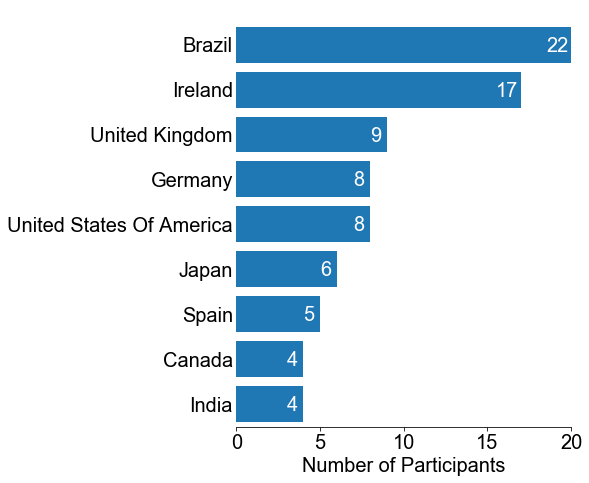

In [11]:
nations = surv["Country where you work"].value_counts()[0:9].sort_values(ascending=True)
fig, ax1 = plt.subplots(figsize=(6,8))

ax1.barh([n.title() for n in nations.index],nations.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -15))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,20))
ax1.set_xlabel("Number of Participants")

for i,(ind,n) in enumerate(nations.iteritems()):
    if n>=20:
        plt.text(x = n-3.5 , y = i-.15 , s = n , size = 20, color="white")
    elif n>=15:
        plt.text(x = n-1.5 , y = i-.15 , s = n , size = 20, color="white")
    else:
        plt.text(x = n-1 , y = i-.15 , s = n , size = 20, color="white")

#fig.tight_layout()
#fig.savefig("nations_top_10.tiff",dpi=300, bbox_inches = "tight")

C:\Users\oldboy\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


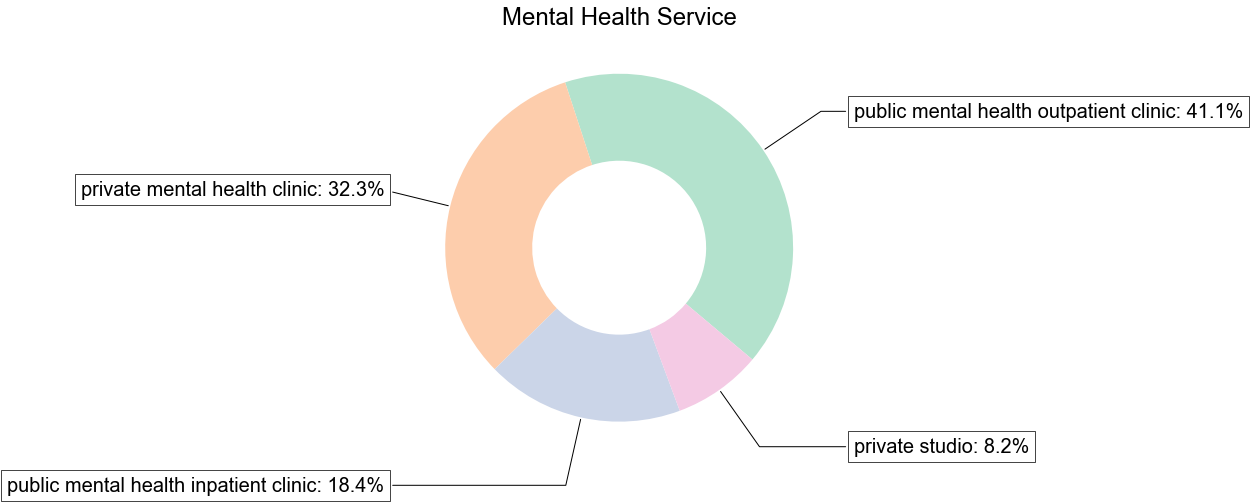

In [12]:
from collections import Counter

tms = [x.lower() for s in surv['Type of Mental Health Service'] for x in s.split(", ")]
for i,c in enumerate(tms):
    if 'university hospital' in c:
        tms[i] = 'public mental health outpatient clinic'
    if c in ['emergency department','court and prison','outpatients and teaching','residential mental health','community health services','department of sleep medicine','university counseling center','academic clinic', 'skilled nursing facility ']:
        tms[i] = 'public mental health outpatient clinic'
    if c in ["women's health center", 'private medical college that includes inpatients']:
        tms[i] = 'private mental health clinic'
    if c in ['charity','voluntary body','private psychotherapy ','organisational psychology','private practice ','private practice psychologist','private psychotherapy practice ','private psychiatric office','psychological', 'private practice', 'life & spiritual coaching' ]:
        tms[i] = 'private studio'

tms = Counter(tms).most_common()
tms =pd.DataFrame(tms).rename(columns = {0:"name",1:"value"})
tms["value"] = 100*(tms["value"]/tms["value"].sum())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

annot = [c[1]["name"]+": "+str(np.round(c[1]["value"],1))+"%" for c in tms.iterrows()]

data = tms["value"].values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mental Health Service")
plt.tight_layout()
plt.show()



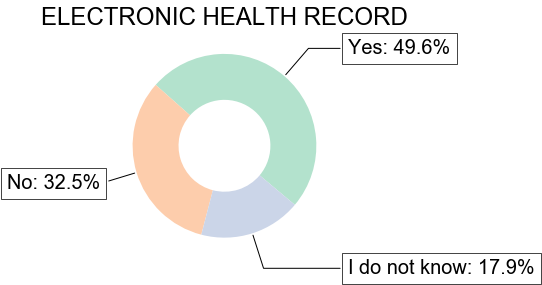

In [13]:
elec_hr = surv["Is your area provided with an electronic health record?"].value_counts()
elec_hr = 100*(elec_hr/elec_hr.sum())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in elec_hr.items()]

data = elec_hr.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("ELECTRONIC HEALTH RECORD")
plt.tight_layout()
plt.show()


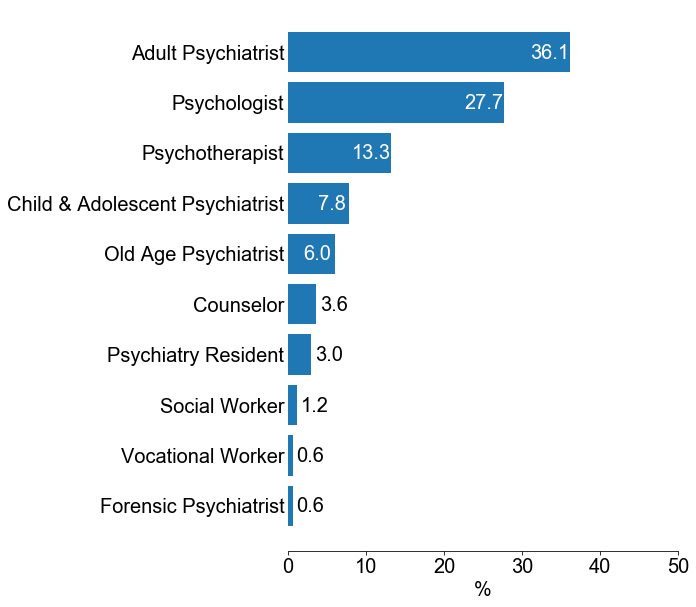

In [14]:
# prendere solo la professione principale
profession = [x.lower() for s in surv["Type of Mental Health Professional"] for x in s.split(", ")]
for i,c in enumerate(profession):
    if c in ['family and marriage counselor','mental health counselor','addiction counselor']:
        profession[i] = 'counselor'
    if c in ["women's health psychiatry"]:
        profession[i] = 'adult psychiatrist'
    if c in ['neuropsychologist','org psych','psychoanalyst','also yoga teacher','psychological astrologer']:
        profession[i] = 'psychologist'


profession = Counter(profession).most_common()
profession =pd.DataFrame(profession).rename(columns = {0:"name",1:"value"}).sort_values(by="value").reset_index(drop=True)
profession["value"] = 100*(profession["value"]/profession["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in profession["name"]],profession["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,n in profession.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-5.1 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>5:
        plt.text(x = n["value"]-4 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>0:
        plt.text(x = n["value"]+.5 , y = i-.13 , s = round(n["value"],1) , size = 20, color="black")
plt.show()

#fig.tight_layout()
#fig.savefig("nations_top_10.tiff",dpi=300, bbox_inches = "tight")

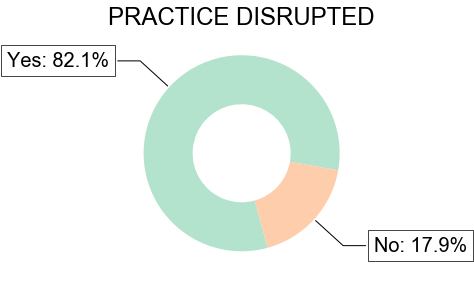

In [15]:
elec_hr = surv["Was your normal practice disrupted during the emergency?"].value_counts()
elec_hr = 100*(elec_hr/elec_hr.sum())

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in elec_hr.items()]

data = elec_hr.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-10,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("PRACTICE DISRUPTED")
plt.tight_layout()
plt.show()

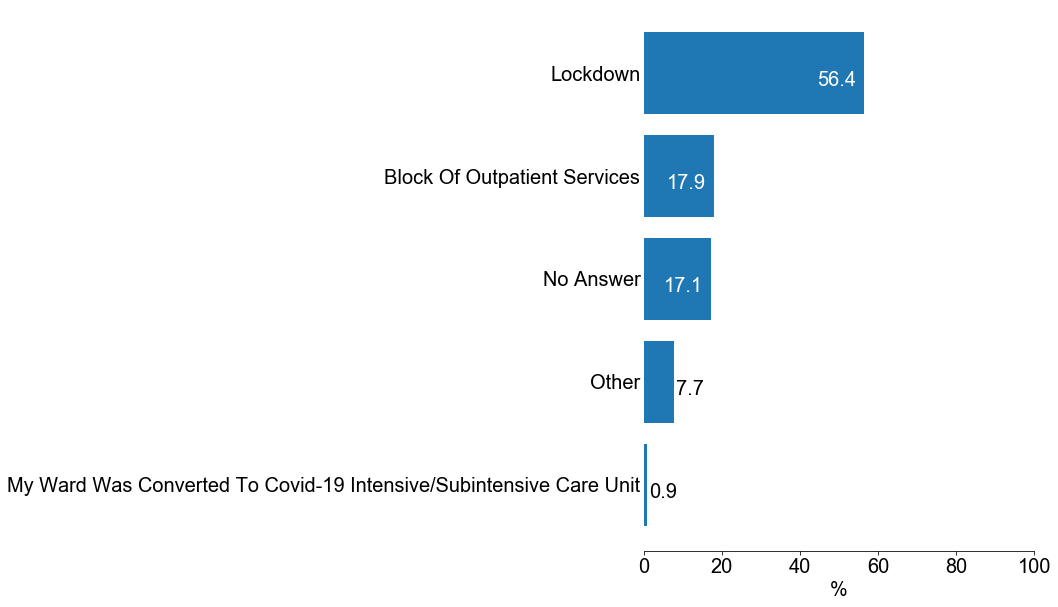

In [16]:
# devo filtrare solo chi ha detto si
reason = surv['If yes, which was the main reason for such disruption?'].copy().values
for i,r in enumerate(reason):
    if type(r)==float :
        reason[i] = "No Answer"
    elif r not in ["No Answer",'Lockdown','Block of outpatient services','My ward was converted to COVID-19 intensive/subintensive care unit']:
        reason[i] = "Other"

reason = Counter(reason).most_common()
reason =pd.DataFrame(reason).rename(columns = {0:"name",1:"value"}).sort_values(by="value").reset_index(drop=True)
reason["value"] = 100*(reason["value"]/reason["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in reason["name"]],reason["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in reason.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-12 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    else:
        plt.text(x = n["value"]+.5 , y = i-.13 , s = round(n["value"],1) , size = 20, color="black")
plt.show()

#fig.tight_layout()
#fig.savefig("nations_top_10.tiff",dpi=300, bbox_inches = "tight")

6.44


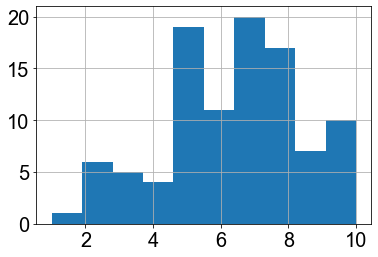

In [17]:
surv["If yes, how much was your practice affected?"].hist()
print(surv["If yes, how much was your practice affected?"].mean())

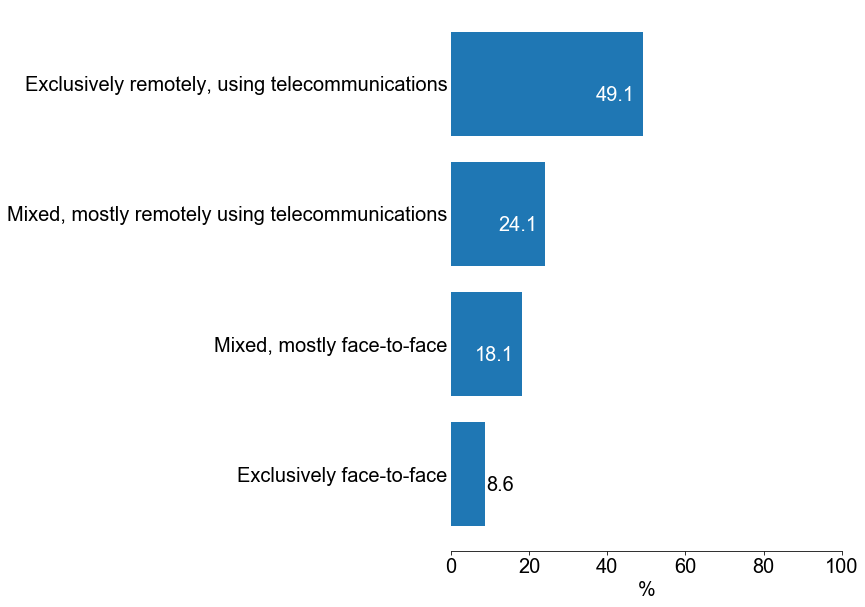

In [18]:
worked = surv["How have you provided mental health care DURING the emergency?"].value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

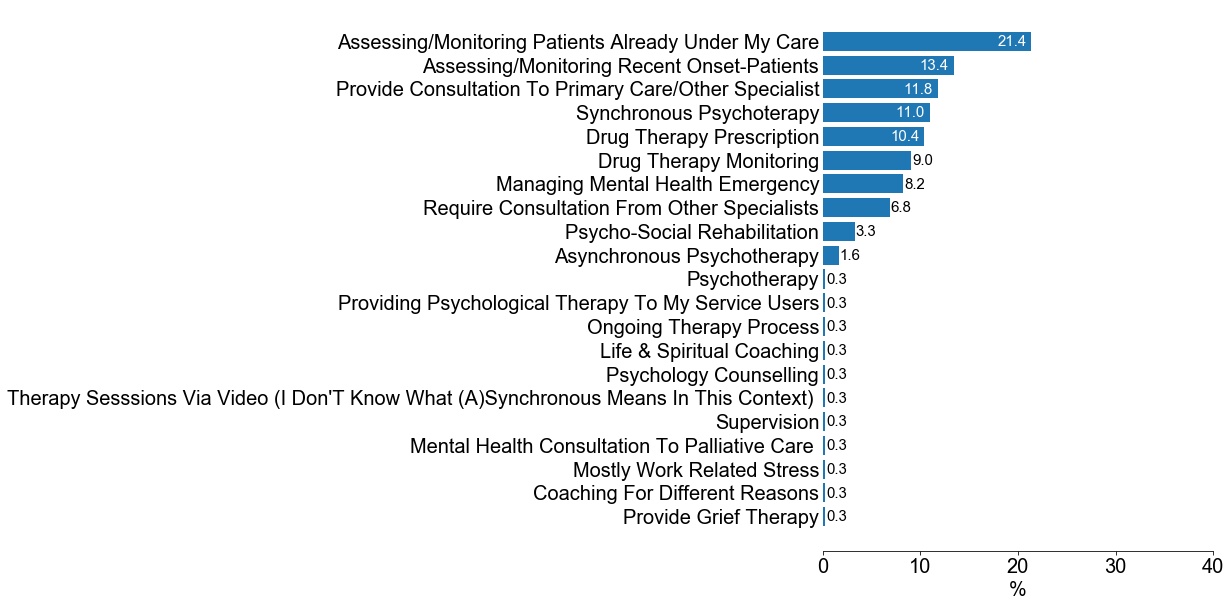

In [19]:
services = surv['Which of the following services have you provided using telecommunications DURING the emergency ?'].dropna()
services = pd.DataFrame(Counter([s for serv in services for s in serv.split(", ")]).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()

#fig.tight_layout()
#fig.savefig("nations_top_10.tiff",dpi=300, bbox_inches = "tight")



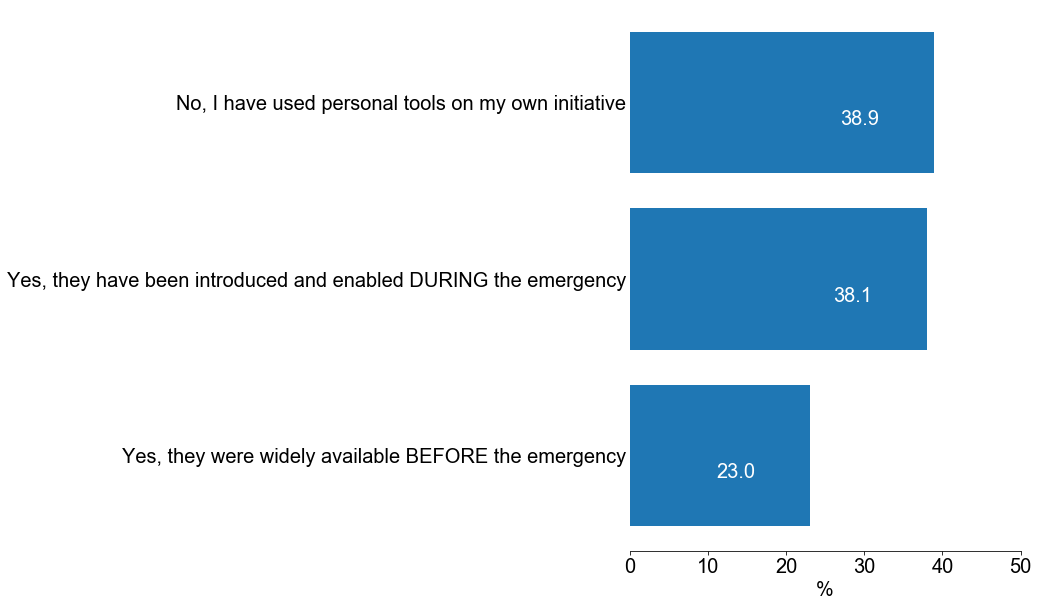

In [20]:
tools = surv['Were telecommunication tools available in your Mental Health Service?'].value_counts().sort_values(ascending=True)


tools = 100*(tools/tools.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(tools.index,tools.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(tools.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()


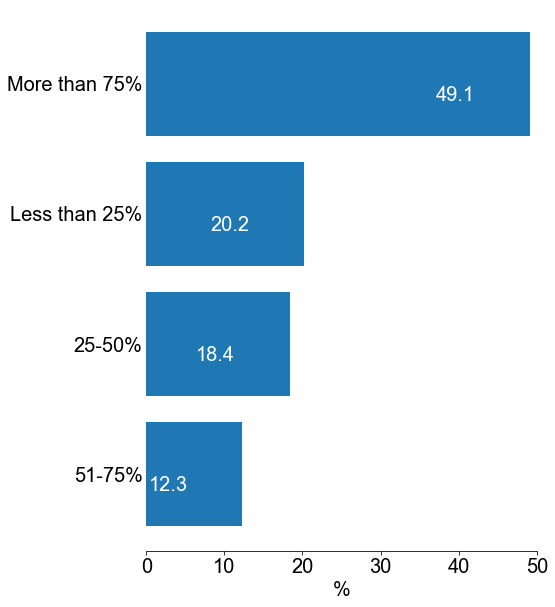

In [21]:
worked = surv['What percentage of your mental health care have you provided using telecommunications DURING the emergency?'].value_counts().sort_values(ascending=True)


worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

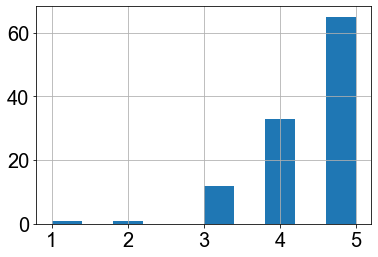

In [22]:
surv['Have you found telepsychiatry useful to reach out and support patients DURING the emergency?'].hist()

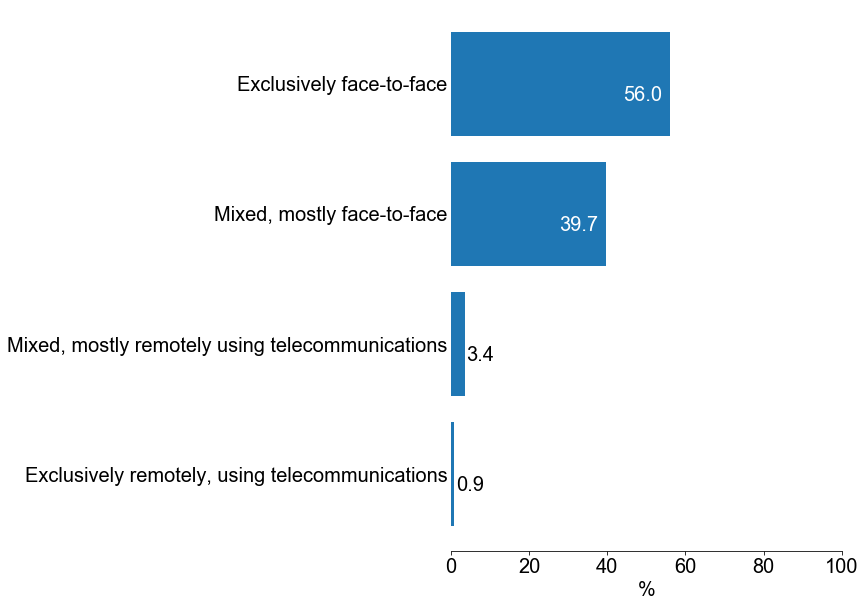

In [23]:
worked = surv['How did you use to provide mental health care BEFORE the emergency?'].value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

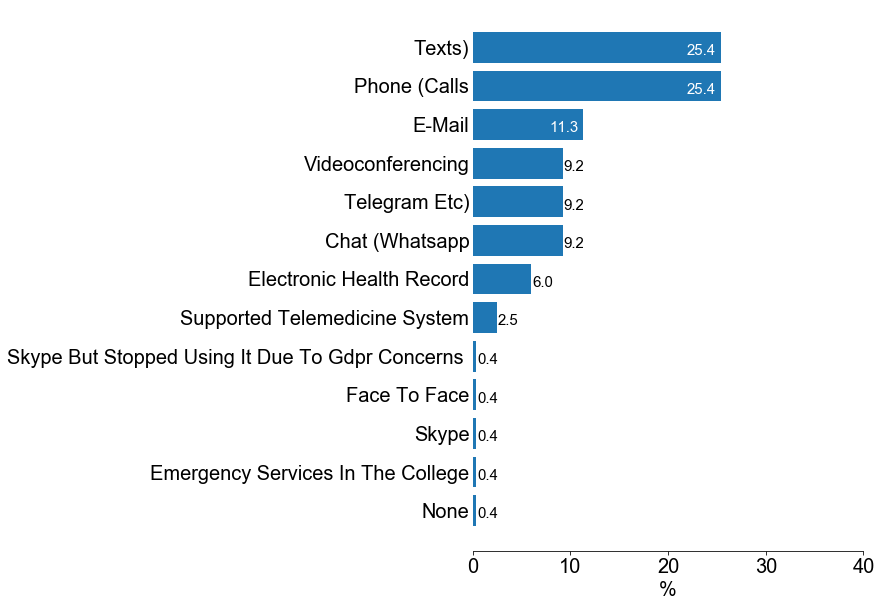

In [24]:
services = surv['Which of the following tools were you using BEFORE the emergency to provide mental health care?'].dropna()
services = pd.DataFrame(Counter([s for serv in services for s in serv.split(", ")]).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()

#fig.tight_layout()
#fig.savefig("nations_top_10.tiff",dpi=300, bbox_inches = "tight")

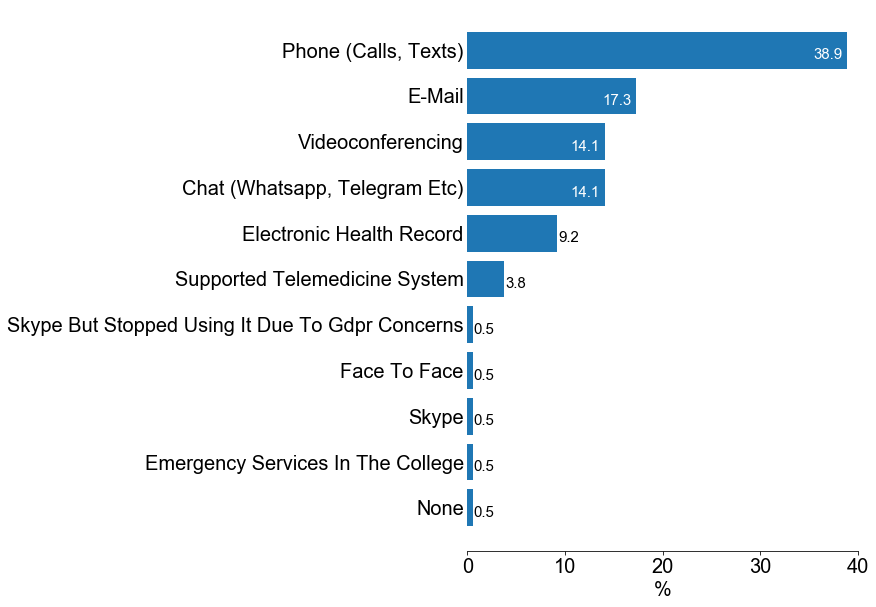

In [25]:
import re 

services = surv['Which of the following tools were you using BEFORE the emergency to provide mental health care?'].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


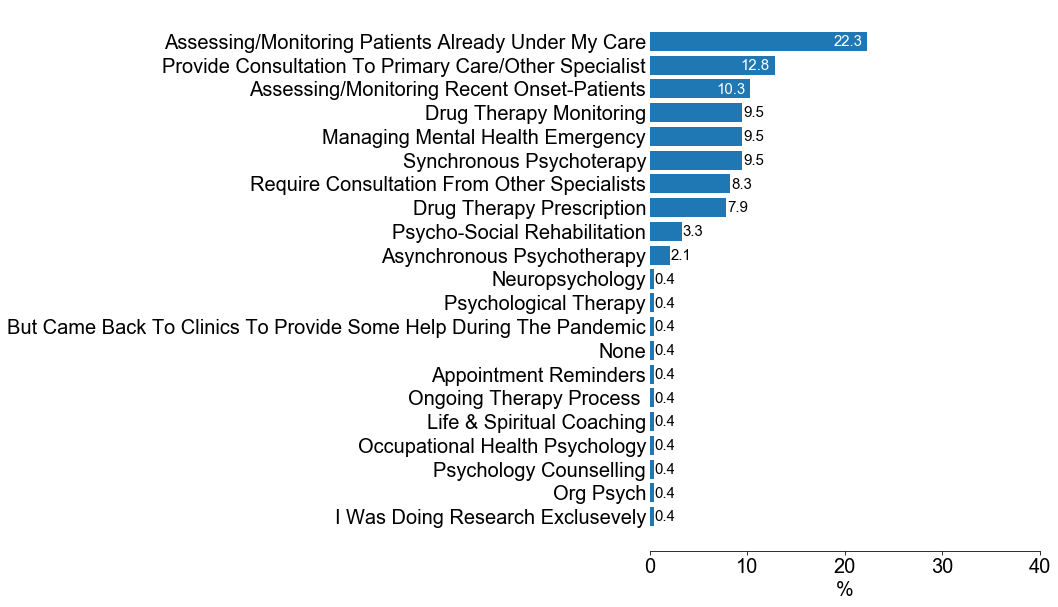

In [26]:
services =  surv['Which of the following services were you providing using telecommunications BEFORE the emergency ?'].dropna()

services = pd.DataFrame(Counter([s for serv in services for s in serv.split(", ")]).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()

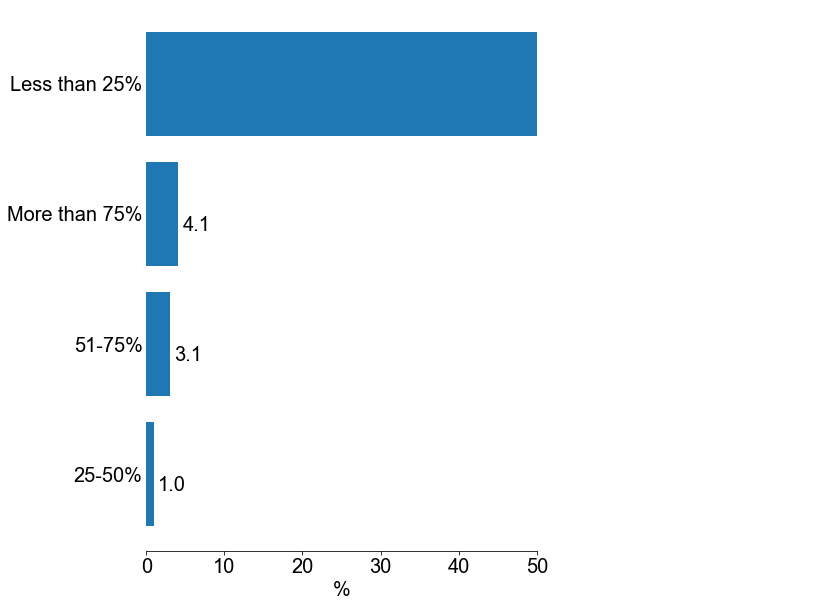

In [27]:
worked = surv['What percentage of your mental health care were you providing using telecommunications BEFORE the emergency?'].value_counts().sort_values(ascending=True)


worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

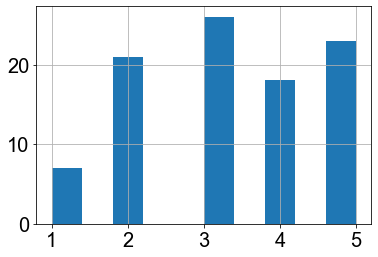

In [28]:
surv['Did you find telepsychiatry useful to reach out and support patients BEFORE the emergency?'].hist()

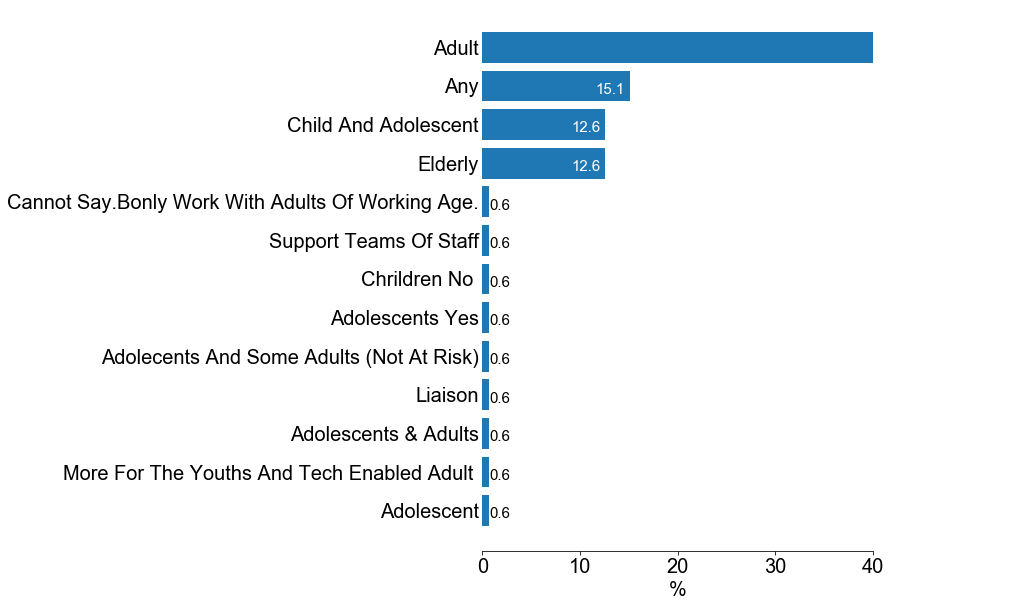

In [29]:
age = surv['Which age do you think telepsychiatry is mostly suited to?'].dropna()
age = pd.DataFrame(Counter([s for serv in age for s in serv.split(", ")]).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

age["value"] = 100*(age["value"]/age["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in age["name"]],age["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in age.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


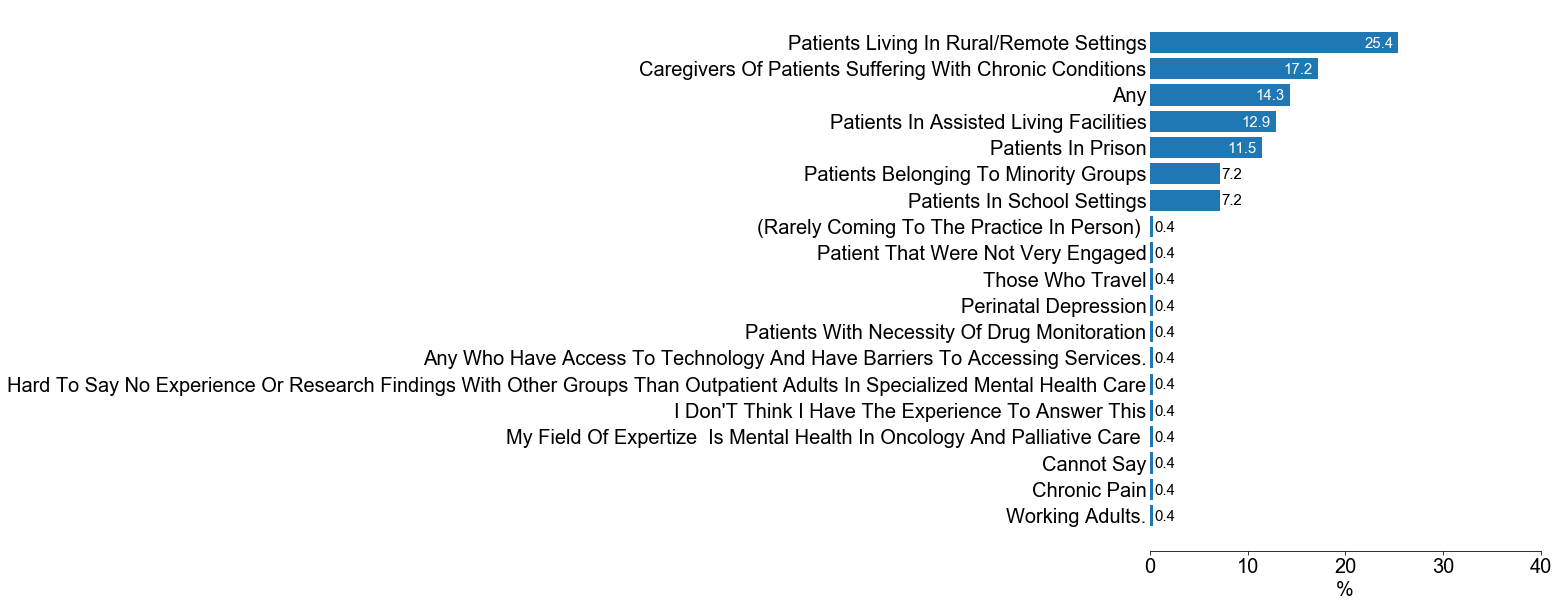

In [30]:
group = surv['Which of the following groups would benefit the most from telepsychiatry in your opinion?'].dropna()

group = pd.DataFrame(Counter([s for serv in group for s in serv.split(", ")]).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

group["value"] = 100*(group["value"]/group["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in group["name"]],group["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in group.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


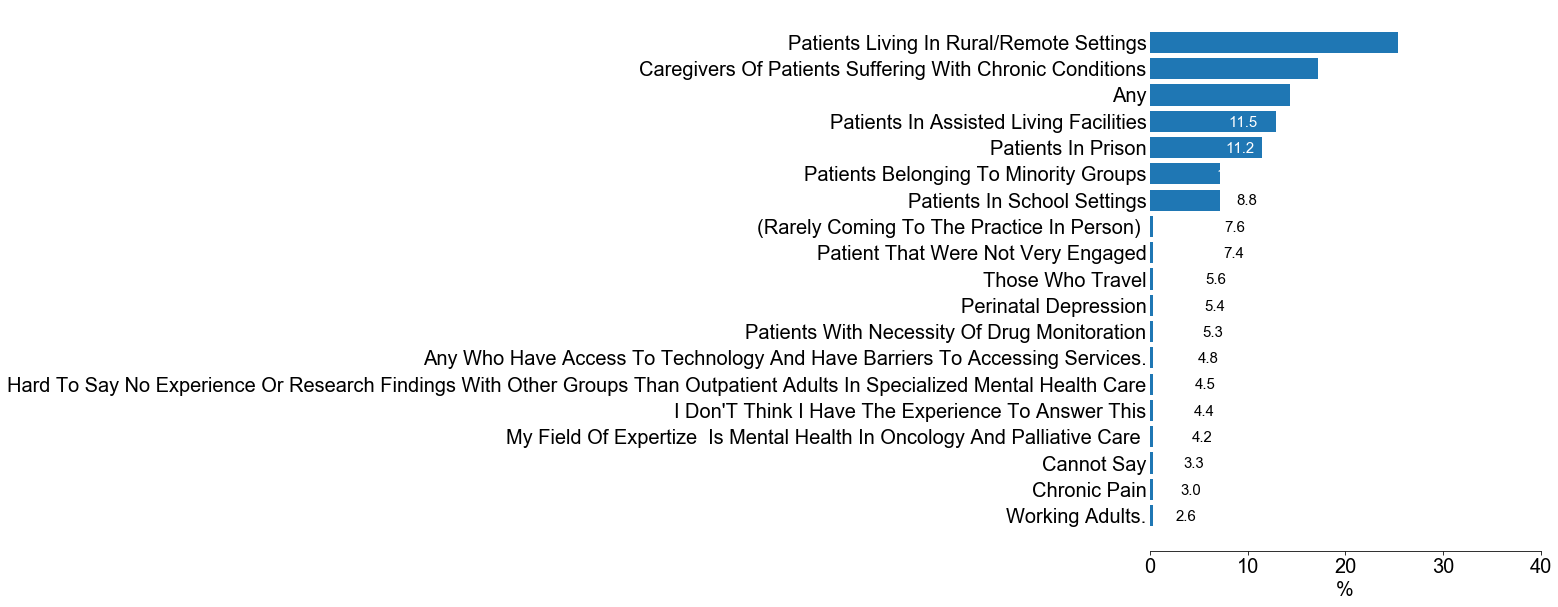

In [31]:
disorder = surv['Which of the following disorders would you treat using telepsychiatry?'].dropna()

disorder = pd.DataFrame(Counter([s for serv in disorder for s in serv.split(", ")]).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

disorder["value"] = 100*(disorder["value"]/disorder["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in group["name"]],group["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in disorder.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.20 , s = round(n["value"],1) , size = 15, color="black")

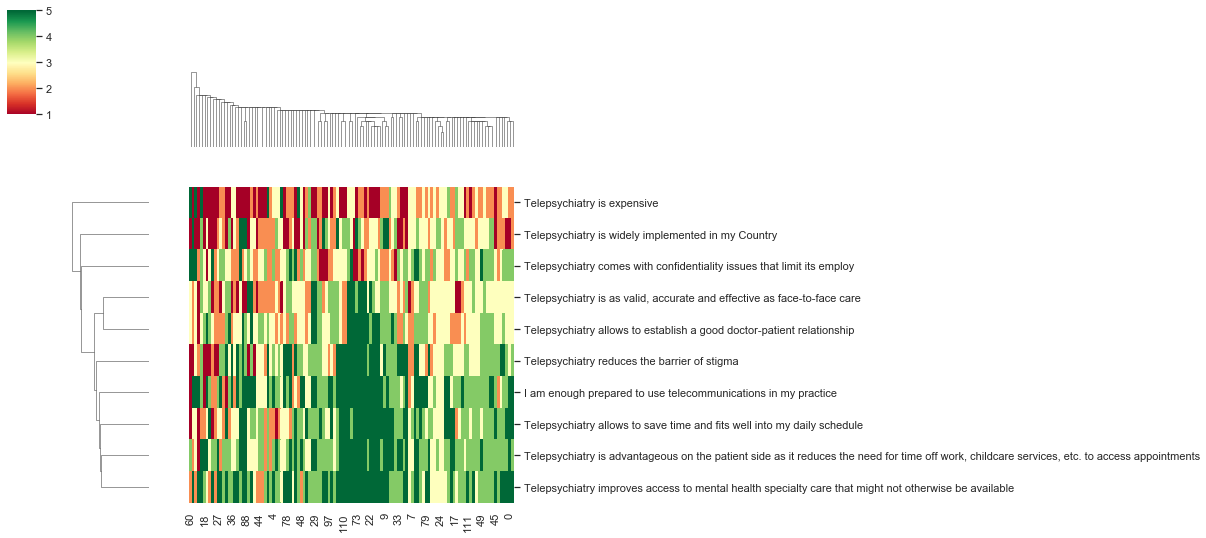

In [78]:
import seaborn as sns
sns.set()
sns.clustermap(surv.iloc[:,23:33].fillna(3).T, figsize=(8, 8),cmap="RdYlGn",method="single",yticklabels=True)

C:\Users\oldboy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1350: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


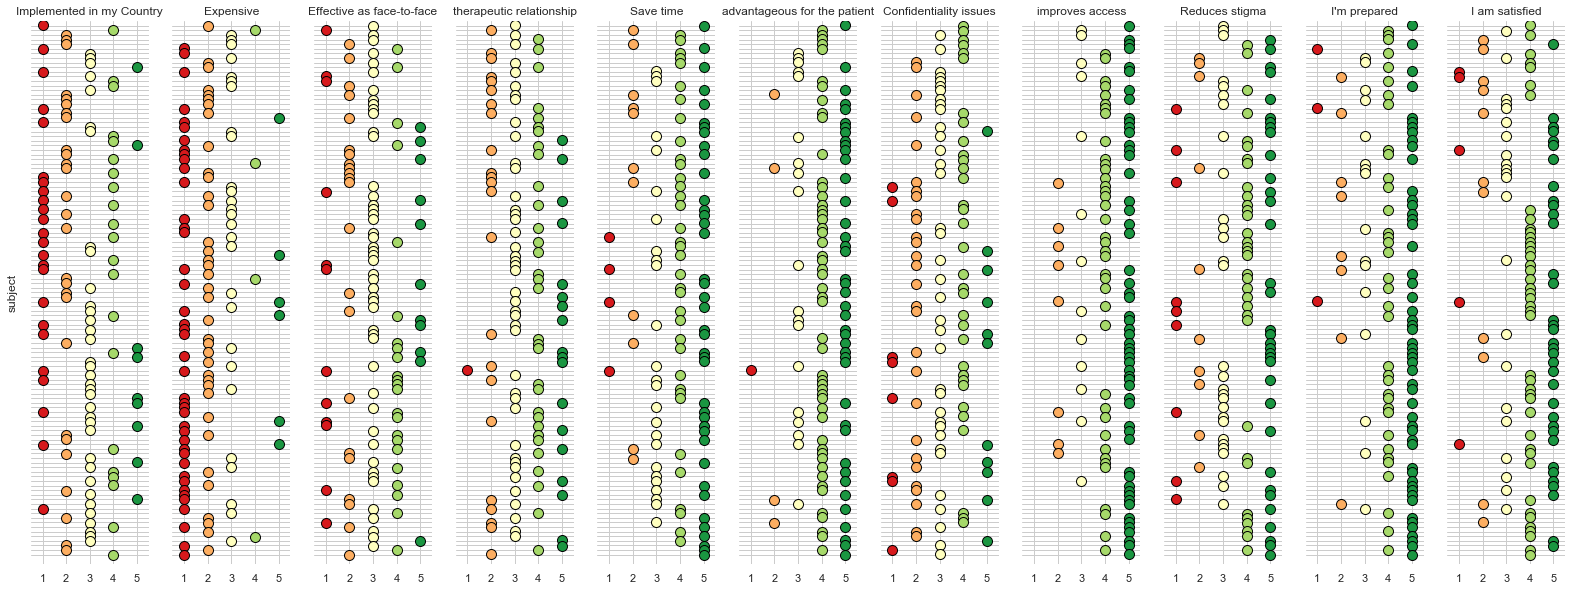

In [33]:
likert = surv.iloc[:,23:34].dropna(axis=0,how="all").fillna(3) # 1 subject is all nan and 1 subject skipped one item [in this subject the answer is replaced with neutral 3]

likert = likert.reset_index().rename(columns= {"index":"subject"})

import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(likert,
                 x_vars=likert.columns[1:], y_vars=["subject"],
                 height=10, aspect=.25,)


def mystrip(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    sns.stripplot(x, y, edgecolor="black", palette=[col[i] for i in x], size=10, orient="h",
    linewidth=1)
    
# Draw a dot plot using the stripplot function
g.map(mystrip)#color="purple")

g.set(xlim=(0.5, 5.5), ylim=(len(likert)+1.1,-1.1,), xlabel="", xticks=[1,2,3,4,5],yticklabels=[])

# Use semantically meaningful titles for the columns
titles = ["Implemented in my Country","Expensive","Effective as face-to-face","therapeutic relationship","Save time",
"advantageous for the patient","Confidentiality issues","improves access","Reduces stigma","I'm prepared","I am satisfied"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)

plt.show()

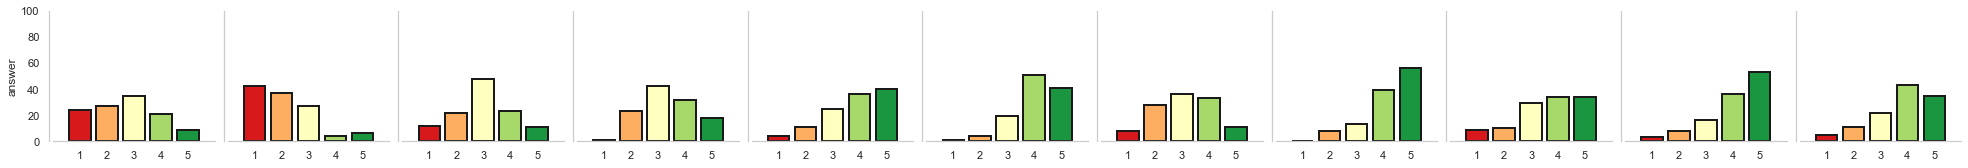

In [34]:
likert = surv.iloc[:,23:34].dropna(axis=0,how="all").fillna(3)
likert_f = likert.agg(pd.value_counts).fillna(0).reset_index().rename(columns={"index":"answer"})

g = sns.PairGrid(likert_f,
                 x_vars=likert_f.columns[1:], y_vars=["answer"],aspect=1,)

def mybar(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    plt.bar(y,x,color=['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641'],edgecolor="k",linewidth=2)

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    #ax.set(title=title)
    #ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_position(('outward', 4))
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

g.map(mybar)
g.set(xlim=(0, 6), ylim=(0,100),xlabel="",xticks=[1,2,3,4,5])

plt.tight_layout()


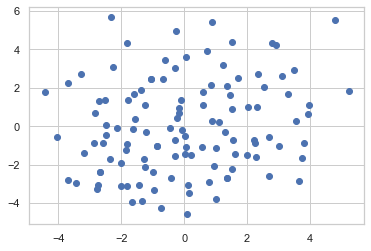

In [66]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=0)
temp = likert.iloc[:,1:]
lik = model.fit_transform(temp.dropna(axis=1)) 

plt.scatter(lik[:,0],lik[:,1])

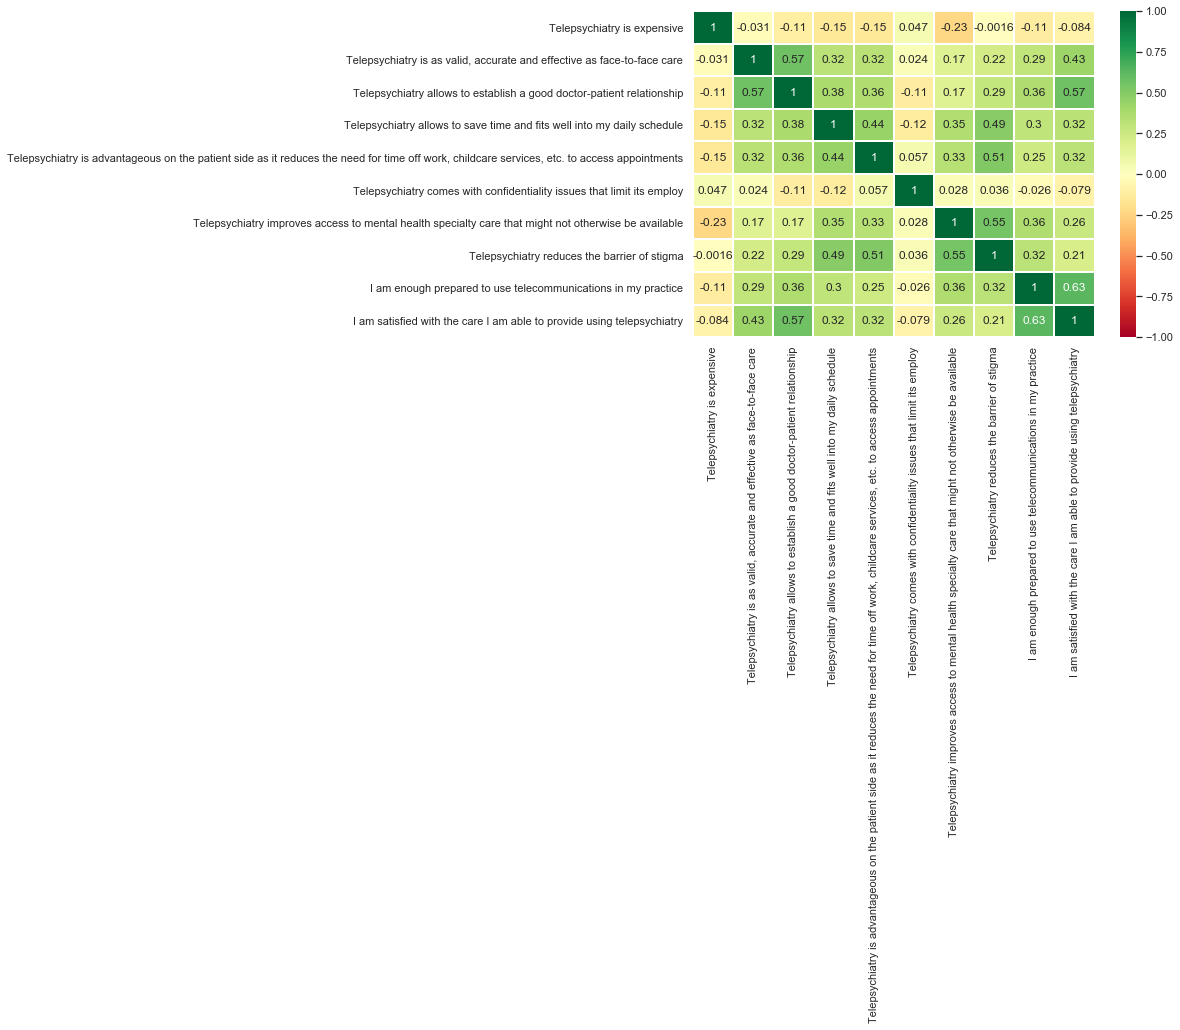

In [89]:

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(likert.iloc[:,1:].corr(method="spearman"), annot=True, linewidths=1, ax=ax,vmin=-1,vmax=1,cmap="RdYlGn")

In [37]:
for i,c in enumerate(surv.columns):
    print(i,c)

0 Age
1 Gender
2 Country where you work
3 Type of Mental Health Service
4 Type of Mental Health Professional
5 Is your area provided with an electronic health record?
6 Was your normal practice disrupted during the emergency?
7 If yes, which was the main reason for such disruption?
8 If yes, how much was your practice affected?
9 How have you provided mental health care DURING the emergency?
10 Which of the following tools have you used DURING the emergency to provide mental health care?
11 Which of the following services have you provided using telecommunications DURING the emergency ?
12 Were telecommunication tools available in your Mental Health Service?
13 What percentage of your mental health care have you provided using telecommunications DURING the emergency?
14 Have you found telepsychiatry useful to reach out and support patients DURING the emergency?
15 How did you use to provide mental health care BEFORE the emergency?
16 Which of the following tools were you using BEFORE t